# Explore Markov Chain model of decay of IBD curves over time
MC: Markov Chain

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import socket as socket
import os as os
import sys as sys
import h5py
import matplotlib.cm as cm
import itertools as it
import multiprocessing as mp

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("bionc") or socket_name.startswith("hpc"):
    print("Leipzig Cluster detected!")
    path = "/mnt/archgen/users/hringbauer/"
    #sys.path.append("/mnt/archgen/users/hringbauer/git/hapBLOCK/python3/")
    #sys.path.insert(0, "/mnt/archgen/users/hringbauer/git/hapBLOCK/package/")
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

hpc030
Leipzig Cluster detected!
/mnt/archgen/users/hringbauer
CPU Count: 128


# ChatGPT suggestions
Suggest when exploring rate matrix with symmetric lower-diagonal entries

In [2]:
from scipy.sparse import diags
from scipy.sparse.linalg import expm_multiply

# Instruction of ChatGPT

In [8]:
# Construct Q
n = 1000
alpha = 0.1
lower = np.full(n-1, alpha)
diagonal = -alpha * np.arange(n)
Q = diags([lower, diagonal], offsets=[-1, 0])

# Set Transition Matrix Harald Way

In [165]:
def get_q_mat(x):
    """Get infinitesimal transition matrix.
    x: List of bins (edges). In Morgan."""
    n = len(x)
    w = x[1]-x[0] # Width of one Bin
    q = np.ones((n,n)) *w
    q = np.tril(q, k=-1)
    v = -np.sum(q, axis=1)
    np.fill_diagonal(q,v)
    return q

In [183]:
x = np.linspace(0,19,191)/100 # Morgan Grid
q = get_q_mat(x)

In [ ]:
#x

## Calculate the Transition Matrix
Compute p(t) for all t in t_list

In [184]:
%%time
# Initialize Condition P0
p0 = np.zeros(len(x))
### For Uniform P0
k=len(p0) 
p0[-k:] = 1/k

### Calculate the time point probs
t_list = np.linspace(0, 10, 100) # Time points

P = expm_multiply(q.T, p0, start=0, stop=100, num=100)

CPU times: user 72.7 ms, sys: 1.77 ms, total: 74.5 ms
Wall time: 72.3 ms


### Plots of state evolution
Plot histograms

In [ ]:
np.sum(P, axis=1)

In [ ]:
x

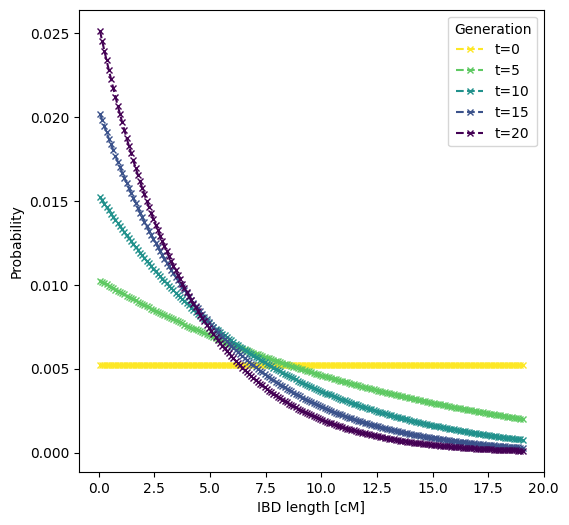

In [195]:
#x =-v*100 # x Axis (converted to cM)
x_plot = x * 100 # Convert to Morgan
t_plot = [0,5,10,15,20]
c_plot = ["#fde725", "#5ec962", "#21918c", "#3b528b", "#440154"]

plt.figure(figsize=(6,6))
ax = plt.gca()
for t,c in zip(t_plot, c_plot):
    #ax.bar(x+x[1]/2, P[t,:], width=x[1], color=c, edgecolor="k", label=f"t={t}", alpha=0.8)
    ax.plot(x_plot+x_plot[1]/2, P[t,:], color=c, label=f"t={t}", alpha=1.0, ls="--", marker="x", ms=5)

ax.legend(loc="upper right", title="Generation")
ax.set_ylabel("Probability")
ax.set_xlabel("IBD length [cM]")
#ax.set_yscale("log")
plt.show()

In [1]:
print("finished")

finished


In [109]:
np.shape(P)

(100, 30)

In [47]:
P[-80,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.16232061])

In [44]:
P[1,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.91310072])